# Social Computing - Summer 2019

# Exercise 2 - Centrality
Centrality is a key concept in social network analysis. It measures the importance or influence of a certain node/edge in a network. The interpretation of importance or influence, however, depends on the type of centrality and the application for which it is measured. Different types of centrality were discussed in the lecture: degree centrality, closeness centrality, betweenness centrality and eigenvector centrality.<br>
In this exercise, you are going to implement different centrality algorithms using the igraph library which you already know from last exercise. You can find its manual [here](https://igraph.org/python/doc/igraph-module.html) and a tutorial [here](https://igraph.org/python/doc/tutorial/tutorial.html).

## Introduction Problem: The Krackhardt Kite Graph
We will use the Krackhardt Kite for the first exercise. As you know from exercise 1, the Krackhardt Kite is a simple connected, unweighted and undirected graph. [This figure](https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG) illustrates the Krackhardt Kite.

**Calculate the degree centrality of the Krackhardt Kite graph - just a list of ten values, one for each node. You can use the pre-defined function of the igraph library.**

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?<br>
**Optional:** Calculate the closeness and betweeness centrality as well. What information do they give us?

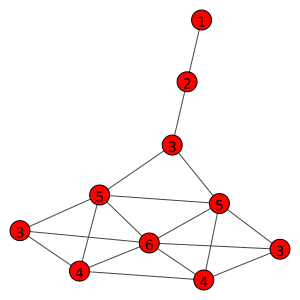

In [1]:
import igraph as ig

# Importing the graph (connected, unweighted, undirected social network)
krackhardt_kite = ig.Graph.Famous('Krackhardt_Kite')

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 20
visual_style['bbox'] = (300, 300)
visual_style['margin'] = 20

# TODO: Calculate the Kite's degree centrality
krackhardt_kite.vs["label"] = krackhardt_kite.degree()

# TODO: Plot the graph
layout=krackhardt_kite.layout_fruchterman_reingold()
ig.plot(krackhardt_kite, **visual_style)

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?

The degree of a vertex is the number of its neighbours or, equivalently, the number of edges that leave it. This is very easy to see in the graphical representation of the graph.

**Optional:** Calculate the closeness and betweeness centrality as well. What information do they give us?

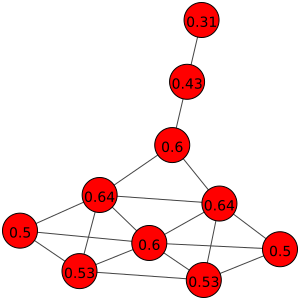

In [2]:
# Closeness centrality:
krackhardt_kite = ig.Graph.Famous('Krackhardt_Kite')
closeness = krackhardt_kite.closeness(vertices=None)

for i in range(10):
    closeness[i] = round(closeness[i], 2)

krackhardt_kite.vs["label"] = closeness
visual_style["vertex_size"] = 35
ig.plot(krackhardt_kite, **visual_style)

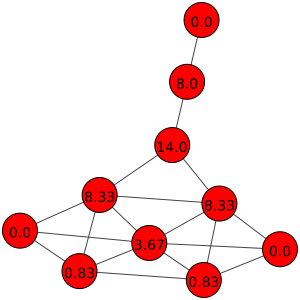

In [3]:
# Betweenness centrality:
krackhardt_kite = ig.Graph.Famous('Krackhardt_Kite')
betweenness = krackhardt_kite.betweenness(vertices=None)

for i in range(10):
    betweenness[i] = round(betweenness[i], 2)

krackhardt_kite.vs["label"] = betweenness
visual_style["vertex_size"] = 35
ig.plot(krackhardt_kite, **visual_style)

__Answer:__

The closeness of a vertex is a measure that is inversely proportional to the sum of the distance from the vertex to all others. We can quickly see that the last vertex on the kite's tail is the farthest from all others, therefore it should have the smallest centrality.

The betweenness of a vertex is related to the number of shortest paths between two vertices in which it participates. Looking again at the last vertex of the kite's tail, it is obvious that it is not part of any shortest path between two other vertex, so its betweenness centrality is 0. Similarly, the vertex between the tail and the head of the kite has a large betweenness centrality, because it participates in all shortest paths from the vertices of tthe head to the vertices in the tail, and vice versa.

## Problem 2.1: Degree Centrality
In the following three problems, you are working with an anonymized real-life social network from [1] represented in the file _UniversityNetwork.graphml_. It represents the faculty of a university, consisting of individuals (vertices) and their directed and weighted connections (edges). The nodes have attributes (which faculty the person is affiliated with), but we will neglect that information. The edges' weights are a measure of friendship between the persons.

**Your task in this exercise is to read in the graph and to calculate the degree centrality of all the nodes in it. Plot the graph as well.** You are **not allowed** to use the pre-defined function `degree()` but have to implement your own. The output should be a list of integers - nodes with a centrality of 0 do not need to be listed, but can be. 

[1] T. Nepusz et al: _Fuzzy communities and the concept of bridgeness in complex networks._ Physical Review E 77:016107, 2008.

**Notes:**
* Degree centrality of a graph node is the number of edges (incoming and outgoing) of that node.
* The functions `Read_GraphML()` and `are_connected()` might help you with the task.

[15, 36, 8, 18, 38, 17, 35, 8, 13, 35, 2, 19, 26, 12, 29, 19, 14, 22, 24, 21, 38, 20, 22, 9, 13, 20, 37, 12, 62, 10, 35, 10, 27, 17, 28, 10, 54, 21, 20, 19, 12, 29, 33, 6, 12, 30, 12, 14, 26, 20, 24, 39, 10, 26, 11, 10, 24, 25, 11, 5, 16, 43, 9, 13, 10, 8, 6, 27, 37, 18, 13, 19, 4, 13, 14, 13, 44, 6, 22, 15, 10]


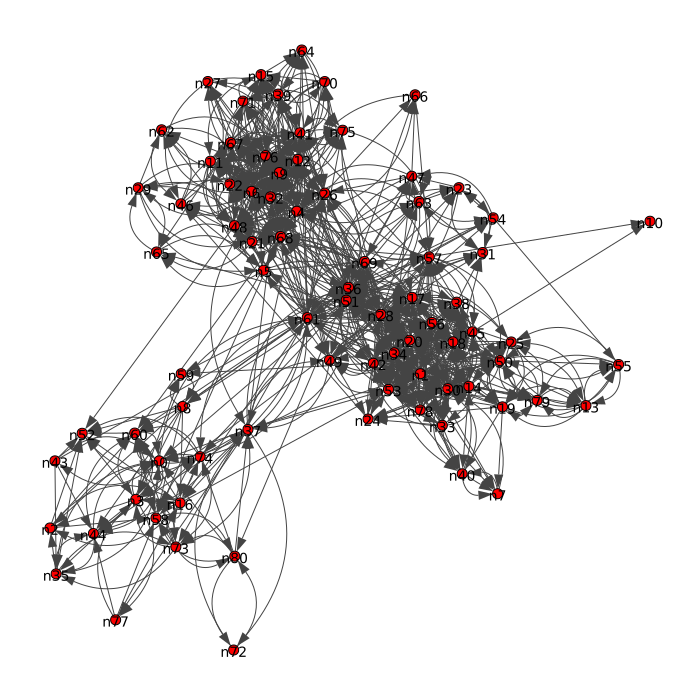

In [4]:
# Calculates degree centrality for a graph g
def degree_centrality(g):
    count = [0]*len(g.vs)
    for edge in g.get_edgelist():
        count[edge[0]] += 1
        count[edge[1]] += 1
    return count

# TODO: Import the graph
g = ig.Graph.Read_GraphML("UniversityNetwork.graphml")

# Formatting the graph
visual_style = {}
visual_style['vertex_size'] = 10
visual_style['vertex_label'] = g.vs['id']
visual_style['bbox'] = (700, 700)
visual_style['margin'] = 50

# TODO: Calculate the degree centrality
print(degree_centrality(g))

# TODO: Plot the graph
layout=g.layout_fruchterman_reingold()
ig.plot(g, **visual_style)

## Problem 2.2: Closeness Centrality

Now we want to take a closer look at the closeness centrality for the given network. It measures how close a node is to other nodes in the graph. This is calculated via the sum of distances from that node to all the other nodes in the graph.

**Write a Python program that computes the closeness centrality for each node for the given social network.** The output should be a list where each item contains the value of the closeness centrality of a node. You are **not allowed** to use the pre-defined function `closeness()` , but you can use it as an inspiration.

**Notes:**
* The formula for the closeness centrality can be found in the lecture or exercise slides.
* Calculating the shortest paths is a common problem, maybe there is a pre-defined function for that?
* The edges of the graph have weights which you need to take into account for shortest paths calculation.
* You can print the node ID list with: `print(g.vs['id'])`
* You can print the edge list with: `print(g)`

In [5]:
# Calculates the closeness centrality for a graph g
def closeness_centrality(g):
    # Calculate shortest paths list for each node
    sps = g.shortest_paths_dijkstra(source=None, target=None, weights=g.es["weight"], mode='OUT')
    
    # Calculate closeness centrality for each node
    clos = []
    for l in sps:
        # expression used by igraph:
        #clos.append((len(sps)-1)/sum(l))
        
        # expression in class
        diameter = g.diameter(directed=True, unconn=True, weights=g.es["weight"])
        clos.append(diameter + 1 - (sum(l) / (len(sps)-1)))
    return clos 



# Calculate closeness centrality
cc = closeness_centrality(g)

for i in range(len(g.vs)):
    print(str(g.vs["id"][i]) + ": " + str(cc[i]))

n0: 18.675
n1: 19.6
n2: 14.7625
n3: 17.3625
n4: 20.225
n5: 19.0
n6: 17.7
n7: 11.0875
n8: 18.9625
n9: 18.8375
n10: -inf
n11: 17.2125
n12: 18.975
n13: 13.4
n14: 19.825
n15: 17.0625
n16: 19.6375
n17: 4.9375
n18: 18.1375
n19: 19.075
n20: 18.0875
n21: 19.05
n22: 15.275
n23: 18.0875
n24: 17.95
n25: 19.675
n26: 19.775
n27: 18.6
n28: 20.2375
n29: 18.05
n30: 19.0125
n31: 6.137499999999999
n32: 18.2
n33: 19.85
n34: 18.65
n35: 16.85
n36: 20.225
n37: 19.8625
n38: 18.8375
n39: 19.1
n40: 14.3125
n41: 17.875
n42: 19.525
n43: 19.6625
n44: 16.7125
n45: 18.5
n46: 14.125
n47: 18.9875
n48: 18.7375
n49: 16.9625
n50: 19.3375
n51: 20.075
n52: 17.35
n53: 18.95
n54: 16.35
n55: 16.05
n56: 18.8625
n57: 18.5375
n58: 15.8625
n59: 11.0
n60: 16.7
n61: 20.5125
n62: 11.1625
n63: 17.1875
n64: 17.0125
n65: 17.2375
n66: 18.5375
n67: 18.3125
n68: 18.7125
n69: 19.5375
n70: 17.225
n71: 18.9375
n72: 17.8875
n73: 14.775
n74: 19.3125
n75: 16.9625
n76: 18.8875
n77: 16.8
n78: 18.55
n79: 17.9875
n80: 18.0375


## Problem 2.3: Betweenness Centrality

Betweenness centrality also measures centrality based on shortest paths. For every pair of vertices in a graph, there exists a shortest path between the vertices such that either the number of edges that the path passes through (for undirected graphs) or the edges' sum of the weights (for directed graphs) is minimized.<br>
Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

**Calculate the betweenness centrality with the help of the pre-defined function in the igraph library. Interpret the resulting values based on two exemplary nodes.** To do that, pick two nodes and explain how their betweenness centrality links to the graph structure. Name the two nodes that you discussed (and their betweenness centrality). Do not write more than 5 sentences.

In [6]:
# TODO: Calculate the betweenness centrality (using the pre-defined function is fine)
bet = g.betweenness(vertices=None, directed=True, cutoff=None, weights=g.es["weight"])

for i in range(len(g.vs)):
    print(str(g.vs["id"][i]) + ": " + str(bet[i]))

n0: 347.1190476190476
n1: 711.2849456099455
n2: 5.5
n3: 185.97867965367965
n4: 727.4570360195363
n5: 296.0070679320679
n6: 245.28560606060597
n7: 0.0
n8: 272.71392496392497
n9: 389.91840936840936
n10: 0.0
n11: 29.895512820512817
n12: 96.76747141747144
n13: 0.0
n14: 104.0853896103896
n15: 16.5
n16: 522.2601731601732
n17: 0.0
n18: 16.460714285714282
n19: 71.6873015873016
n20: 143.31594516594515
n21: 231.1086080586081
n22: 0.8333333333333333
n23: 241.39406288156283
n24: 43.779761904761905
n25: 5.419119769119768
n26: 260.06964840714835
n27: 79.31155511155511
n28: 684.1950577200577
n29: 37.27811355311355
n30: 109.79137806637809
n31: 0.0
n32: 20.645274170274167
n33: 39.41746031746032
n34: 263.6281746031746
n35: 0.0
n36: 1223.084436396936
n37: 628.5462481962483
n38: 139.34864163614165
n39: 148.1517857142857
n40: 0.2
n41: 143.46257631257632
n42: 77.79577922077925
n43: 4.273809523809524
n44: 5.166666666666666
n45: 106.81428571428576
n46: 5.5666666666666655
n47: 325.6341491841492
n48: 248.017507

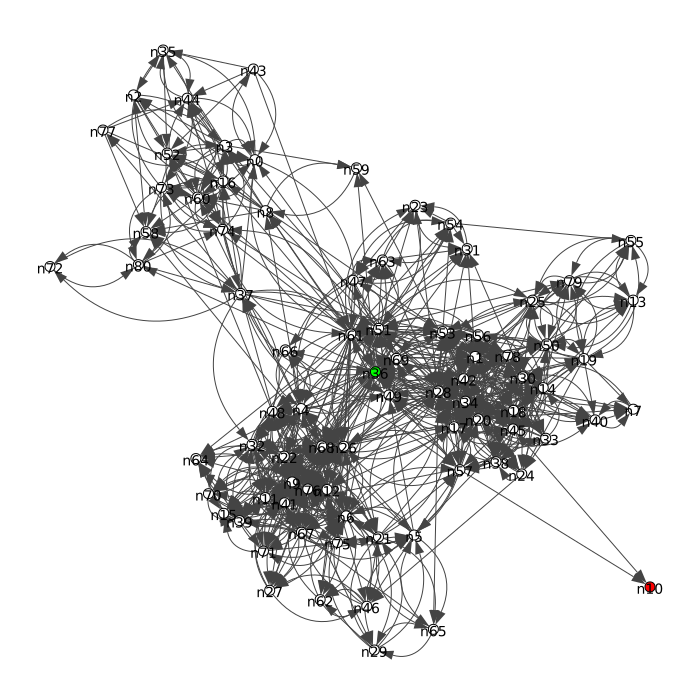

In [7]:
visual_style = {}
visual_style['vertex_size'] = 10
visual_style['vertex_label'] = g.vs['id']
visual_style['bbox'] = (700, 700)
visual_style['margin'] = 50

color_dict = {}
for i in g.vs['id']:
    color_dict[i] = "white"
    
color_dict["n10"] = "red"
color_dict["n36"] = "green"

g.vs["color"] = [color_dict[id] for id in g.vs["id"]]

ig.plot(g, **visual_style)

**TODO: Write your discussion here!**

n10 (in red): betweenness centrality is 0. These node have no outgoing edges so they can never be part of a path between two other nodes.

n36 (in green): betweenness centrality is very large (> 900). This node has a very large in-degree and out-degree which makes it ideal to establish small paths between other nodes, which is why it has such large betweenness centralities.